Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Load data

In [ ]:
hiring_stats = pd.read_csv("stackoverflow_full.csv")

In [ ]:
hiring_stats.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


Data Wrangling

Subsetting the data to remove unncessary columns

In [ ]:
hiring_stats1 = hiring_stats[['Age', 'EdLevel', 'Gender', 'MentalHealth','YearsCode', 'Country', 'PreviousSalary', 'ComputerSkills', 'HaveWorkedWith', 'Employed']]

In [ ]:
hiring_stats1.head()

,Age,EdLevel,Gender,MentalHealth,YearsCode,Country,PreviousSalary,ComputerSkills,HaveWorkedWith,Employed
0,<35,Master,Man,No,7,Sweden,51552.0,4,C++;Python;Git;PostgreSQL,0
1,<35,Undergraduate,Man,No,12,Spain,46482.0,12,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,1
2,<35,Master,Man,No,15,Germany,77290.0,7,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,0
3,<35,Undergraduate,Man,No,9,Canada,46135.0,13,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,0
4,>35,PhD,Man,No,40,Singapore,160932.0,2,C++;Python,0


### Coverting String to integer on Age, Gender, Mental Health, and EdLevel for further wrangling and analysis

In [ ]:
hiring_stats1['EdLevel'].value_counts()

EdLevel
Undergraduate    37402
Master           18903
Other            10843
NoHigherEd        3706
PhD               2608
Name: count, dtype: int64

In [ ]:
hiring_stats1['Age'].value_counts()

Age
<35    47819
>35    25643
Name: count, dtype: int64

In [ ]:
hiring_stats1['MentalHealth'].value_counts()

MentalHealth
No     56944
Yes    16518
Name: count, dtype: int64

In [ ]:
hiring_stats1['Country'].value_counts()

Country
United States of America                                14696
Germany                                                  5395
India                                                    5360
United Kingdom of Great Britain and Northern Ireland     4688
Canada                                                   2779
                                                        ...  
Saint Kitts and Nevis                                       1
Monaco                                                      1
Dominica                                                    1
Burundi                                                     1
Seychelles                                                  1
Name: count, Length: 172, dtype: int64

In [ ]:
hiring_stats1['Gender'].value_counts()

Gender
Man          68573
Woman         3518
NonBinary     1371
Name: count, dtype: int64

In [ ]:
hiring_stats1['HaveWorkedWith'].value_counts()

HaveWorkedWith
Python                                                                                                                                                                                                                                                                                                       71
Python;Git                                                                                                                                                                                                                                                                                                   54
C++;Python                                                                                                                                                                                                                                                                                                   49
C++                                                                      

In [ ]:
pd.set_option('display.max_rows', None)
hiring_stats1['ComputerSkills'].value_counts()

ComputerSkills
11     4656
10     4551
12     4524
13     4483
14     4329
9      4236
8      4005
15     3879
7      3636
16     3488
6      3147
17     3136
18     2757
5      2693
19     2329
4      2152
20     1988
21     1755
3      1557
22     1442
23     1265
24     1013
2      1012
25      864
26      713
27      596
28      496
29      371
1       370
30      323
31      280
32      233
33      181
34      147
35      140
36      101
37       88
38       71
0        63
39       52
40       51
42       46
41       45
43       32
44       22
45       20
47       16
46       15
48       13
49       10
50       10
53        8
51        8
52        7
57        4
55        4
54        4
61        3
68        3
78        2
62        2
63        2
91        2
65        2
67        1
56        1
79        1
64        1
101       1
105       1
58        1
90        1
107       1
Name: count, dtype: int64

### Creating a Function for the EdLevel Category

In [ ]:
def EdLevel_recode(series):
    if series == 'NoHigherEd':
        return 1
    elif series == 'Undergraduate':
        return 2
    elif series == 'Master':
        return 3
    elif series == 'PhD':
        return 4
    else:
        return None

hiring_stats1.loc[:, 'EdLevelR'] = hiring_stats1['EdLevel'].apply(EdLevel_recode)

/tmp/ipykernel_59/2333544288.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats1.loc[:, 'EdLevelR'] = hiring_stats1['EdLevel'].apply(EdLevel_recode)


### Creating a Function for the Age Category

In [ ]:
def change_Age_to_integer(series):
    if series == '<35':
        return 0
    elif series == '>35':  
        return 1

hiring_stats1.loc[:, 'AgeR'] = hiring_stats1['Age'].apply(change_Age_to_integer)

/tmp/ipykernel_59/1940308025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats1.loc[:, 'AgeR'] = hiring_stats1['Age'].apply(change_Age_to_integer)


### Creating a Function for the Gender Category

In [ ]:
def Gender_recode(series):
    if series == 'Man':
        return 0
    elif series == 'Woman':
        return 1
    elif series == 'NonBinary':
        return 2

hiring_stats1.loc[:, 'GenderR'] = hiring_stats1['Gender'].apply(Gender_recode)

/tmp/ipykernel_59/4262027392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats1.loc[:, 'GenderR'] = hiring_stats1['Gender'].apply(Gender_recode)


### Creating a Function for the Mental Health Category

In [ ]:
def MentalHealth_recode(series):
    if series == 'No':
        return 0
    if series == 'Yes':
        return 1
   
hiring_stats1.loc[:, 'MentalHealthR'] = hiring_stats1['MentalHealth'].apply(MentalHealth_recode)

/tmp/ipykernel_59/4161529695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats1.loc[:, 'MentalHealthR'] = hiring_stats1['MentalHealth'].apply(MentalHealth_recode)


### Creating a Function to categorize countries into separate buckets

In [ ]:
def division_country(country):
    if country in ['United States of America', 'Canada', 'Mexico']:
        return 'NorthAmerica'
    elif country in ['United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']:
        return 'Europe'
    elif country in ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']:
        return 'South America'
    elif country in ['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']:
        return 'Australia'
    else:
        return 'Others' 


hiring_stats1['Continent'] = hiring_stats['Country'].apply(division_country)

### Creating a dummy code fo the different programming languages the applicants have worked with

In [ ]:
dummy_coded = hiring_stats1['HaveWorkedWith'].str.get_dummies(sep=';')

### Fusing the dummycoded dataframe back with orginal

In [ ]:
hiring_stats1_combined = pd.concat([hiring_stats1, dummy_coded], axis=1)

### Dropping the orginal HaveWorkedWith Column so data is usuable for analysis

In [ ]:
hiring_stats1_combined.drop(columns=['HaveWorkedWith'], inplace=True)

In [ ]:
column_list = hiring_stats1_combined.columns.tolist()
print(column_list)

['Age', 'EdLevel', 'Gender', 'MentalHealth', 'YearsCode', 'Country', 'PreviousSalary', 'ComputerSkills', 'Employed', 'EdLevelR', 'AgeR', 'GenderR', 'MentalHealthR', 'Continent', 'APL', 'ASP.NET', 'ASP.NET Core ', 'AWS', 'Angular', 'Angular.js', 'Ansible', 'Assembly', 'Bash/Shell', 'Blazor', 'C', 'C#', 'C++', 'COBOL', 'Cassandra', 'Chef', 'Clojure', 'Cloud Firestore', 'Colocation', 'CouchDB', 'Couchbase', 'Crystal', 'Dart', 'Delphi', 'Deno', 'DigitalOcean', 'Django', 'Docker', 'Drupal', 'DynamoDB', 'Elasticsearch', 'Elixir', 'Erlang', 'Express', 'F#', 'FastAPI', 'Fastify', 'Firebase', 'Firebase Realtime Database', 'Flask', 'Flow', 'Fortran', 'Gatsby', 'Git', 'Go', 'Google Cloud', 'Google Cloud Platform', 'Groovy', 'HTML/CSS', 'Haskell', 'Heroku', 'Homebrew', 'IBM Cloud or Watson', 'IBM DB2', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Kubernetes', 'LISP', 'Laravel', 'Linode', 'Lua', 'MATLAB', 'Managed Hosting', 'MariaDB', 'Matlab', 'Microsoft Azure', 'Microsoft SQL Server', 'MongoDB', 'My

### Attempting to get the frequency of Languages to determine the most common programming

In [ ]:
languages_list = hiring_stats1['HaveWorkedWith'].str.split(';')

exploded_languages = languages_list.explode()

language_counts = exploded_languages.value_counts()

language_counts_sorted = language_counts.sort_values(ascending=False)

print("Most Common Programming Languages:")
print(language_counts_sorted)

Most Common Programming Languages:
HaveWorkedWith
JavaScript                     49347
Docker                         40224
HTML/CSS                       40207
SQL                            38361
Git                            35911
AWS                            31590
Python                         31159
PostgreSQL                     30102
MySQL                          29490
TypeScript                     27533
Node.js                        26043
React.js                       24695
Java                           22653
Bash/Shell                     21929
C#                             21724
Microsoft SQL Server           20105
SQLite                         19324
jQuery                         18812
Microsoft Azure                17963
MongoDB                        17283
npm                            17066
Redis                          16595
PHP                            15409
Yarn                           15303
Kubernetes                     14775
Angular                  

### Attempting to visualize a tier system of the programming languages

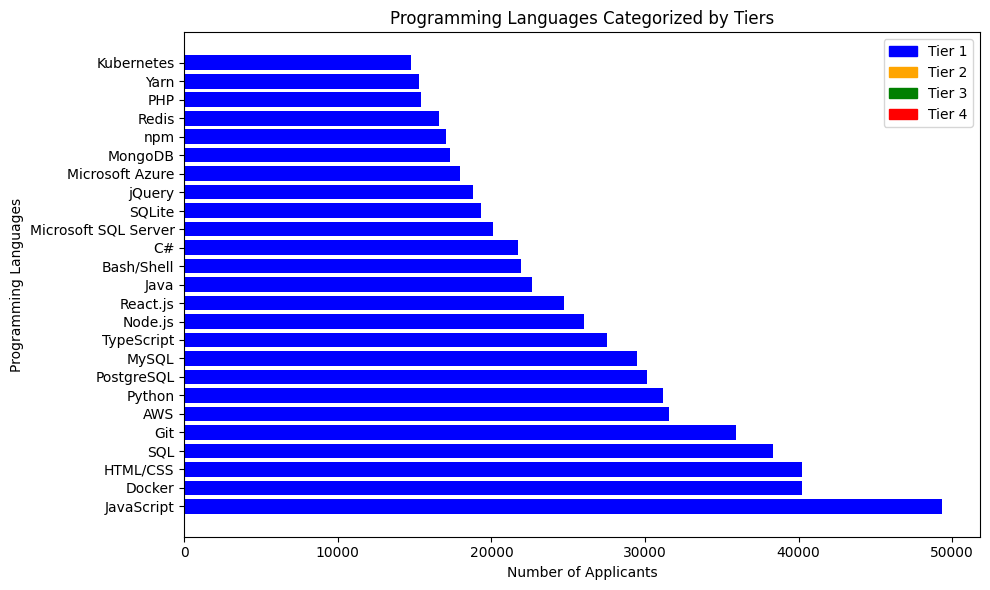

In [ ]:
programming_languages = ["JavaScript", "Docker", "HTML/CSS", "SQL", "Git", "AWS", "Python", "PostgreSQL", "MySQL", "TypeScript",
"Node.js", "React.js", "Java", "Bash/Shell", "C#", "Microsoft SQL Server", "SQLite", "jQuery", "Microsoft Azure", "MongoDB",
"npm", "Redis", "PHP", "Yarn", "Kubernetes", "Angular", "Express", "C++", "ASP.NET Core", "Vue.js", "MariaDB", "Elasticsearch",
"C", "ASP.NET", "Heroku", "Firebase", "DigitalOcean", "PowerShell", "Google Cloud Platform", "Oracle", "Go", "Flask", "Homebrew", "Django",
"Terraform", "Angular.js", "Ansible", "Kotlin", "Google Cloud", "DynamoDB", "Laravel", "Ruby", "Spring","Rust", "Ruby on Rails", "Unity 3D",
"Dart", "Swift", "Next.js", "VBA", "R", "Groovy", "FastAPI", "Symfony", "Gatsby", "Assembly", "Scala", "Firebase Realtime Database",
"Objective-C", "Delphi", "Cloud Firestore", "Svelte", "Perl", "VMware", "Cassandra", "Elixir", "Xamarin", "Drupal", "Unreal Engine",
"IBM DB2", "Clojure", "Managed Hosting", "Matlab", "Blazor", "Puppet", "Haskell", "Nuxt.js", "Chef", "Lua", 'Couchbase', "OVH", 
"MATLAB", "Linode","IBM Cloud or Watson", "Oracle Cloud Infrastructure", "F#", "Deno", "Julia", "LISP", "Flow", "Phoenix",
"Erlang", "Neo4j", "Fastify", "Pulumi", "OpenStack", 'COBOL', "Solidity", "CouchDB", "Crystal", "Colocation", "Fortran",
"APL", "Play Framework", "SAS", "OCaml"]

num_applicants = [49347, 40224, 40207, 38361, 35911,31590, 31159, 30102, 29490, 27533, 26043, 24695, 22653,
21929, 21724, 20105, 19324, 18812, 17963, 17283, 17066, 16595, 15409, 15303, 14775, 14398, 13268, 12670,
12639, 11763, 11382, 10448, 10226, 10197, 9860, 9821, 9224, 9117, 8544, 8044, 8001, 7920, 7758, 7434, 7378,
6591, 6362, 6345, 6311, 6118, 5912, 5678, 5242, 4931, 4528, 4268, 3903, 3731, 3382, 3362,2994, 2884,2835, 2488,
2414, 2405, 2107, 2074, 2050, 1881,1855, 1846, 1804, 1789, 1743, 1663, 1514, 1472, 1447, 1443, 1439, 1406, 1330,
1287, 1245, 1041, 986, 950, 939, 931, 907, 894, 883, 858, 789, 774, 769, 759, 722, 640, 633, 618, 575, 462, 453,
364, 363, 356, 336, 271, 236, 222, 208, 150, 112 ]


tier1 = ["JavaScript", "Docker", "HTML/CSS", "SQL", "Git", "AWS", "Python", "PostgreSQL", "MySQL", "TypeScript",
"Node.js", "React.js", "Java", "Bash/Shell", "C#", "Microsoft SQL Server", "SQLite", "jQuery", "Microsoft Azure", "MongoDB",
"npm", "Redis", "PHP", "Yarn", "Kubernetes"]
tier2 = ["Angular", "Express", "C++", "ASP.NET Core", "Vue.js", "MariaDB", "Elasticsearch",
"C", "ASP.NET", "Heroku", "Firebase", "DigitalOcean", "PowerShell", "Google Cloud Platform", "Oracle", "Go", "Flask", "Homebrew", "Django",
"Terraform", "Angular.js", "Ansible", "Kotlin", "Google Cloud", "DynamoDB", "Laravel", "Ruby", "Spring","Rust", "Ruby on Rails", "Unity 3D",
"Dart", "Swift"]
tier3 = ["Next.js", "VBA", "R", "Groovy", "FastAPI", "Symfony", "Gatsby", "Assembly", "Scala", "Firebase Realtime Database",
"Objective-C", "Delphi", "Cloud Firestore", "Svelte", "Perl", "VMware", "Cassandra", "Elixir", "Xamarin", "Drupal", "Unreal Engine",
"IBM DB2", "Clojure", "Managed Hosting", "Matlab", "Blazor", "Puppet", "Haskell", "Nuxt.js", "Chef", "Lua", 'Couchbase', "OVH"]
tier4 = ["MATLAB", "Linode","IBM Cloud or Watson", "Oracle Cloud Infrastructure", "F#", "Deno", "Julia", "LISP", "Flow", "Phoenix",
"Erlang", "Neo4j", "Fastify", "Pulumi", "OpenStack", 'COBOL', "Solidity", "CouchDB", "Crystal", "Colocation", "Fortran",
"APL", "Play Framework", "SAS", "OCaml"]  


colors = {'Tier 1': 'blue', 'Tier 2': 'orange', 'Tier 3': 'green', 'Tier 4': 'red'}


tier_labels = []
tier_counts = []


for lang, count in zip(programming_languages, num_applicants):
    if lang in tier1:
        tier_labels.append(lang)
        tier_counts.append(count)


plt.figure(figsize=(10, 6))
bars = plt.barh(tier_labels, tier_counts, color=[colors['Tier 1']]*len(tier_labels))
plt.xlabel('Number of Applicants')
plt.ylabel('Programming Languages')
plt.title('Programming Languages Categorized by Tiers')
plt.tight_layout()


plt.legend(handles=[plt.Rectangle((0,0),1,1, color=colors['Tier 1']), 
                    plt.Rectangle((0,0),1,1, color=colors['Tier 2']),
                    plt.Rectangle((0,0),1,1, color=colors['Tier 3']),
                    plt.Rectangle((0,0),1,1, color=colors['Tier 4'])], 
           labels=['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'])

plt.show()

### Getting the TOP 10 Coding languages worked with

In [ ]:
top_10_languages = language_counts_sorted.head(10)

print("Top 10 Programming Languages:")
print(top_10_languages)

Top 10 Programming Languages:
HaveWorkedWith
JavaScript    49347
Docker        40224
HTML/CSS      40207
SQL           38361
Git           35911
AWS           31590
Python        31159
PostgreSQL    30102
MySQL         29490
TypeScript    27533
Name: count, dtype: int64


### This is very valuable information as students in Bethel Tech work alot with these Languages like Python,SQL, AWS, and Javascript

### Getting the 10 Least Used Programming Languages

In [ ]:
Obsolete_10_languages = language_counts_sorted.tail(10)
print("10 Least Used Programming Languages:")
print(Obsolete_10_languages)

10 Least Used Programming Languages:
HaveWorkedWith
COBOL             364
Solidity          363
CouchDB           356
Crystal           336
Colocation        271
Fortran           236
APL               222
Play Framework    208
SAS               150
OCaml             112
Name: count, dtype: int64


### Subsetting Data to include only the the TOP 10 Languages

In [ ]:
hiring_stats2 = hiring_stats1_combined[['AgeR', 'EdLevelR', 'GenderR', 'MentalHealthR','YearsCode', 'Continent', 'PreviousSalary', 'ComputerSkills', 'Employed', 'JavaScript', 'Docker', 'HTML/CSS', 'SQL', 'Git', 'AWS', 'Python', 'PostgreSQL', 'MySQL', 'TypeScript']]

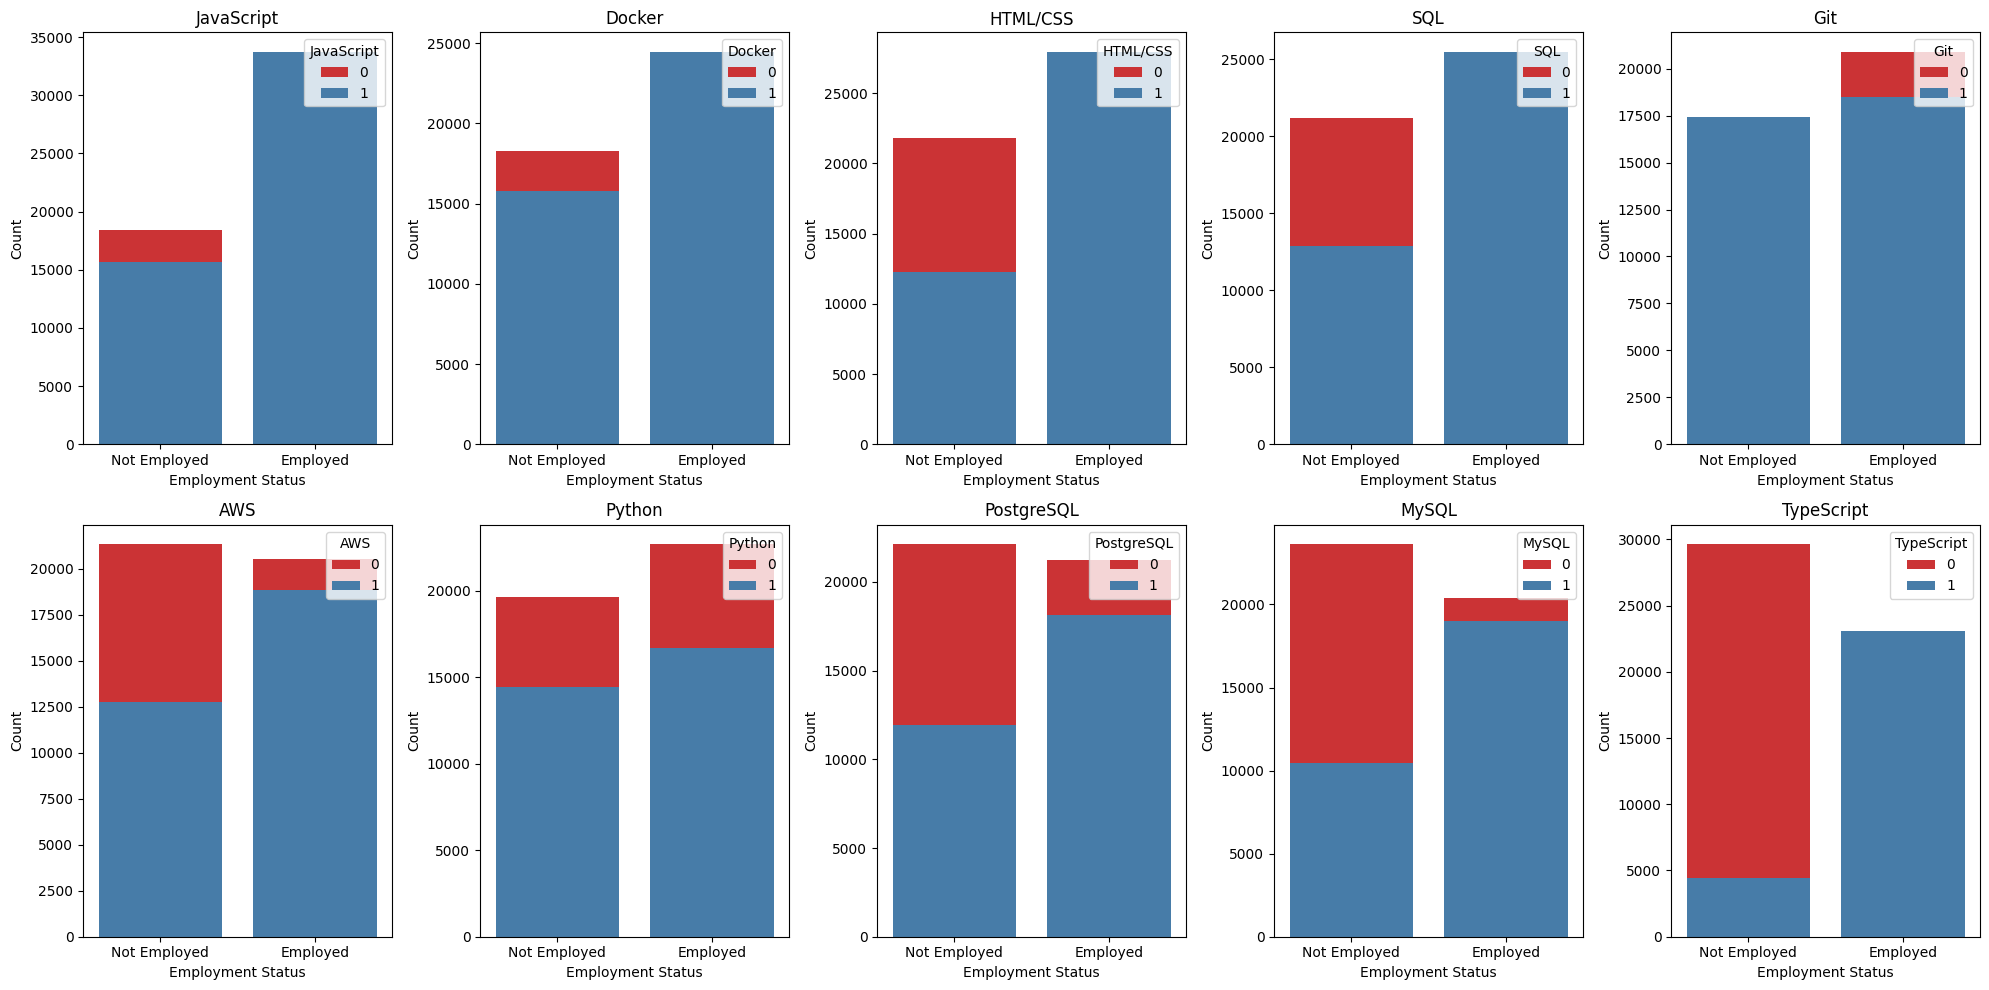

In [ ]:
programming_languages = ['JavaScript', 'Docker', 'HTML/CSS', 'SQL', 'Git', 'AWS', 'Python', 'PostgreSQL', 'MySQL', 'TypeScript']

plt.figure(figsize=(20, 10))
for i, lang in enumerate(programming_languages, start=1):
    plt.subplot(2, 5, i)
    sns.countplot(data=hiring_stats2, x='Employed', hue=lang, palette='Set1', dodge=False)
    plt.xlabel('Employment Status')
    plt.xticks(ticks=[0,1], labels=['Not Employed', 'Employed'])
    plt.ylabel('Count')
    plt.title(f'{lang}')
    plt.legend(title=lang, loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
column_list = hiring_stats2.columns.tolist()
print(column_list)

['AgeR', 'EdLevelR', 'GenderR', 'MentalHealthR', 'YearsCode', 'Continent', 'PreviousSalary', 'ComputerSkills', 'Employed', 'JavaScript', 'Docker', 'HTML/CSS', 'SQL', 'Git', 'AWS', 'Python', 'PostgreSQL', 'MySQL', 'TypeScript']


### Combining the Coding Languages into one single column renamed as HaveWorkedWith10

In [ ]:
hiring_stats2['HaveWorkedWith10'] = hiring_stats2.iloc[:, 9:].sum(axis=1)
hiring_stats2.drop(hiring_stats2.columns[9:-1], axis=1, inplace=True)

/tmp/ipykernel_59/1013348727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats2['HaveWorkedWith10'] = hiring_stats2.iloc[:, 9:].sum(axis=1)
/tmp/ipykernel_59/1013348727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats2.drop(hiring_stats2.columns[9:-1], axis=1, inplace=True)


# Dropping Missing Values

In [ ]:
hiring_stats3 = hiring_stats2.dropna()

In [ ]:
hiring_stats3.head()

,AgeR,EdLevelR,GenderR,MentalHealthR,YearsCode,Continent,PreviousSalary,ComputerSkills,Employed,HaveWorkedWith10
0,0,3.0,0,0,7,Europe,51552.0,4,0,3
1,0,2.0,0,0,12,Europe,46482.0,12,1,7
2,0,3.0,0,0,15,Europe,77290.0,7,0,1
3,0,2.0,0,0,9,NorthAmerica,46135.0,13,0,7
4,1,4.0,0,0,40,Asia,160932.0,2,0,1


# Exploratory DataAnalysis

Getting the Distribution of the Data

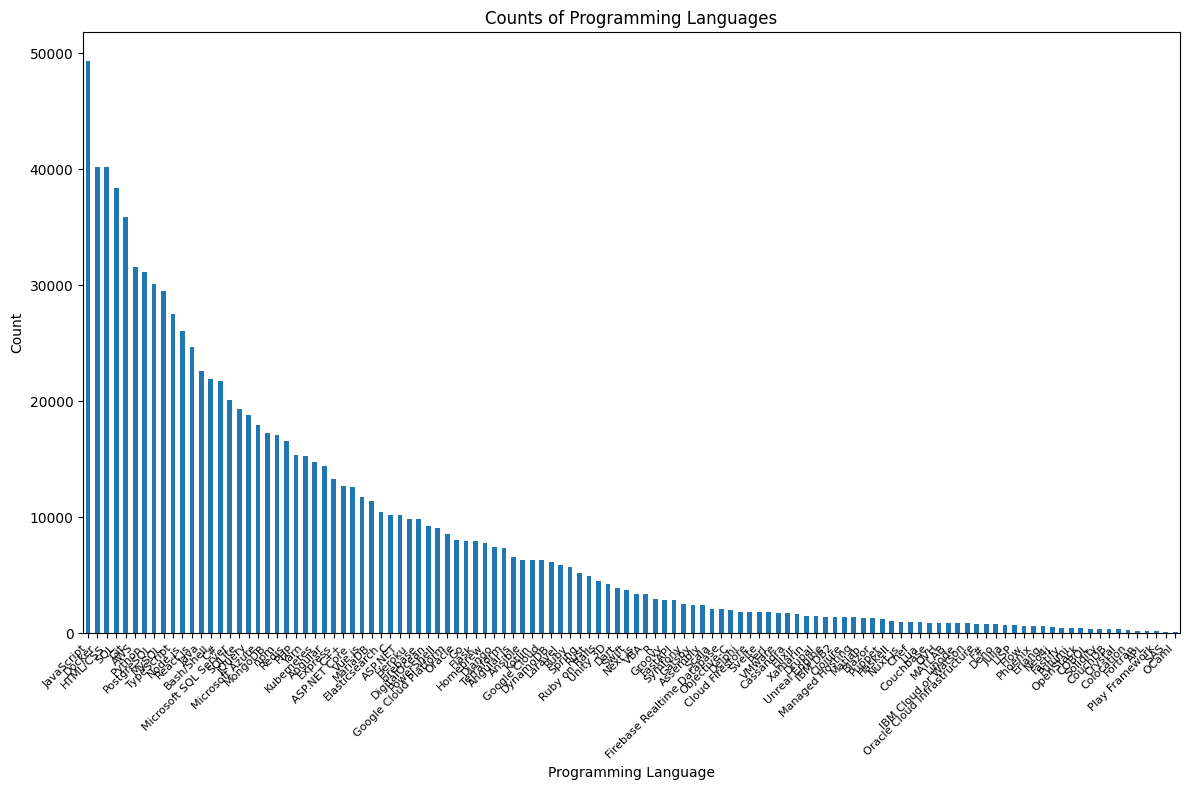

In [ ]:
plt.figure(figsize=(12, 8))  
language_counts.plot(kind='bar')
plt.title('Counts of Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=8) 
plt.tight_layout()
plt.show()

After reviewing Computer Skills and the Any Languages correlation columns, I can see that they are essentially the same as the correlation amounts are the same and the totaled dummy coded items equal the amounts found in computer skills. However it is still useful as I have been able to determine what languages the applicants have the most exposure to and I am interested to see if having experience with these languages influences the chances of being hired.

<Axes: ylabel='Frequency'>

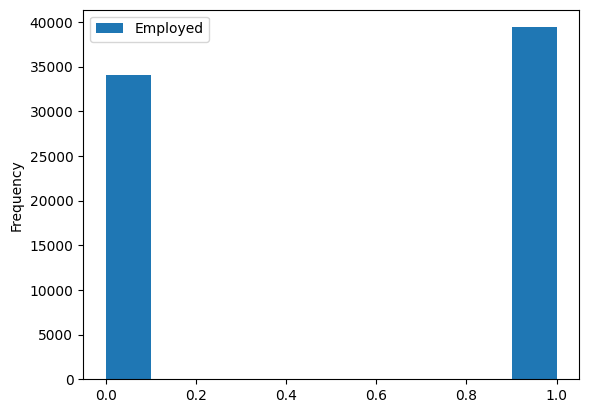

In [ ]:
hiring_stats.plot.hist(y="Employed")

Looks like we have an almost even split of applicants employed and not employed.

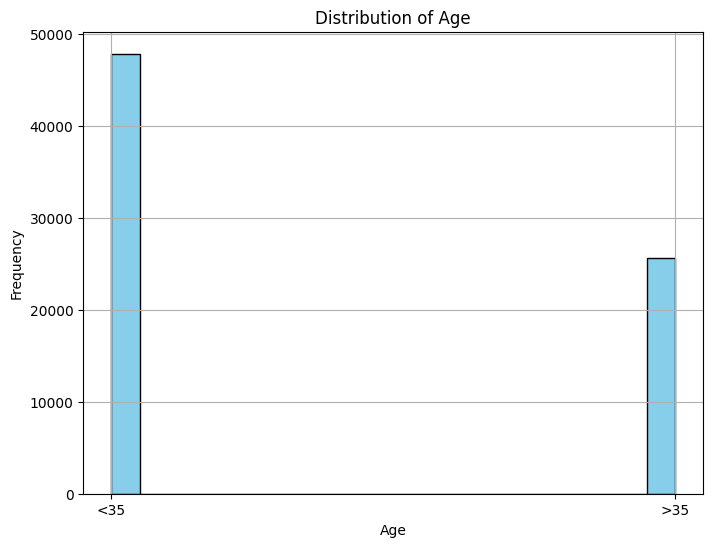

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(hiring_stats['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Appears we have alot of applicants under 35. Possible Bias may be found in the hiring process

In [ ]:
education_distribution = hiring_stats['EdLevel'].value_counts()

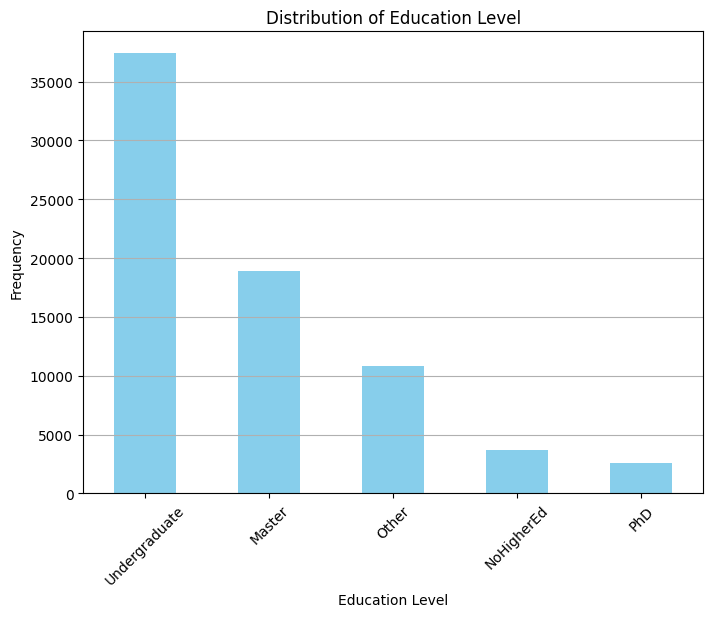

In [ ]:
plt.figure(figsize=(8, 6))
education_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Our applicants are predominately undergraduates

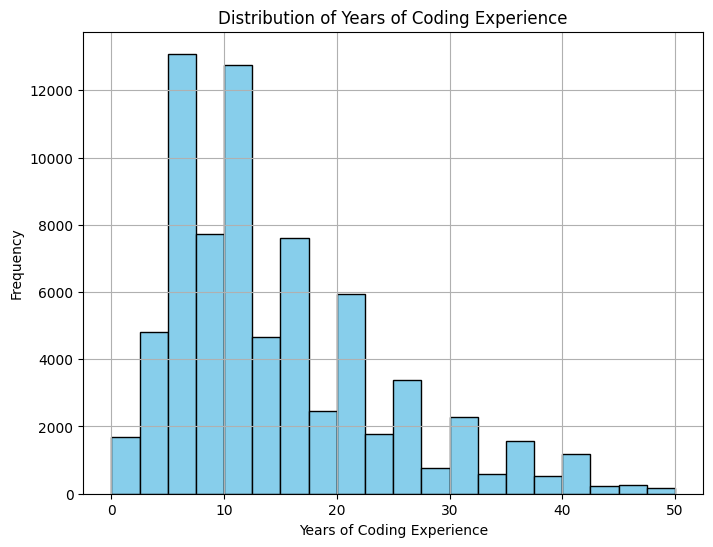

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(hiring_stats['YearsCode'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Years of Coding Experience')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Most of the coding experience is concentrated between possibly 6 months-15 years

### Getting an average of the salaries for the applicants

In [ ]:
average_previous_salary = hiring_stats['PreviousSalary'].mean()

print("Average Previous Salary:", average_previous_salary)

Average Previous Salary: 67750.2606109281


### General consensus for previous salary appears to be around 68K

array([[<Axes: title={'center': 'YearsCode'}>,
        <Axes: title={'center': 'PreviousSalary'}>,
        <Axes: title={'center': 'ComputerSkills'}>],
       [<Axes: title={'center': 'Employed'}>,
        <Axes: title={'center': 'EdLevelR'}>,
        <Axes: title={'center': 'AgeR'}>],
       [<Axes: title={'center': 'GenderR'}>,
        <Axes: title={'center': 'MentalHealthR'}>, <Axes: >]],
      dtype=object)

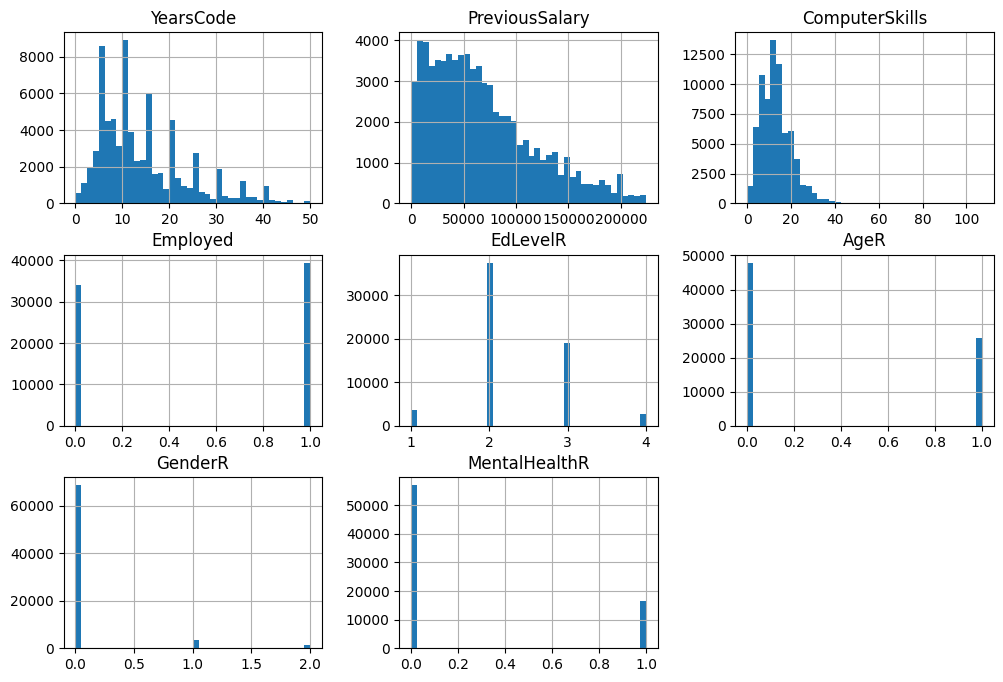

In [ ]:
hiring_stats1.hist(bins = 40, figsize =(12,8))

### After analyzing these charts, I can see this is a very male dominated space and most hires are under the age of 35 with an undergraduate education level

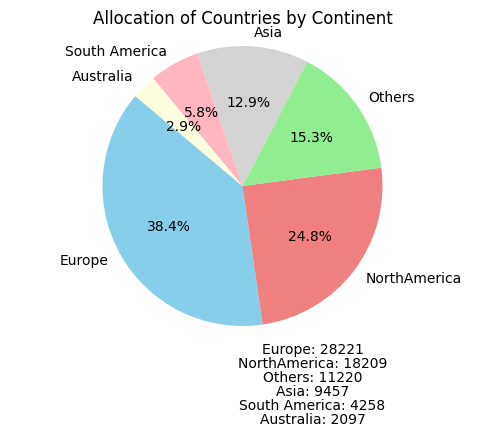

In [ ]:
continent_distribution = hiring_stats1['Continent'].value_counts()

plt.figure(figsize=(6, 4))  
plt.pie(continent_distribution, labels=continent_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightgray', 'lightpink', 'lightyellow'])


plt.title('Allocation of Countries by Continent')
plt.axis('equal')  


for i, percentage in enumerate(continent_distribution):
    plt.text(x=0.5, y=-1.2 - i * 0.1, s=f"{continent_distribution.index[i]}: {percentage}", ha='center', fontsize=10)

plt.show()


A Majority of the applicants are from North America and Europe

# Relationship between Employment and Programming Languages

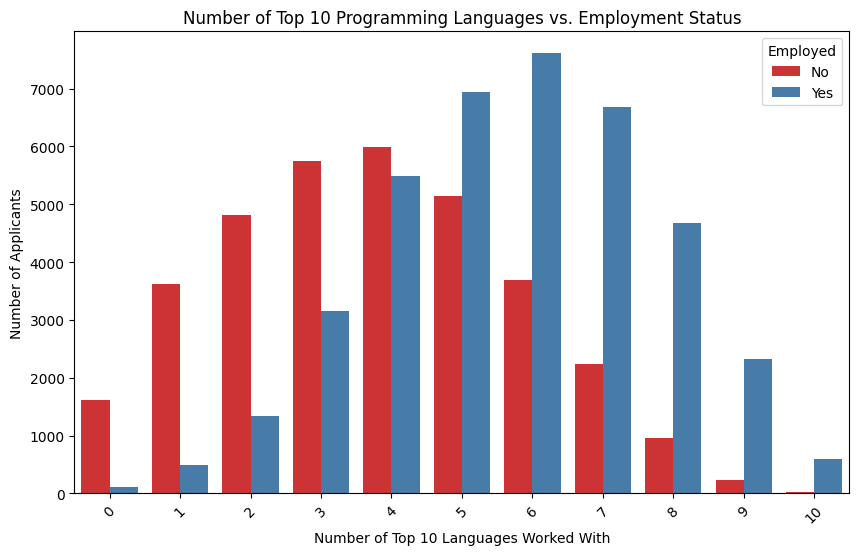

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hiring_stats2, x='HaveWorkedWith10', hue='Employed', palette='Set1')
plt.xlabel('Number of Top 10 Languages Worked With')
plt.ylabel('Number of Applicants')
plt.title('Number of Top 10 Programming Languages vs. Employment Status')
plt.xticks(rotation=45)
plt.legend(title='Employed', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Relationship between Education Level and Salary

/tmp/ipykernel_59/984189514.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hiring_stats3, x='EdLevelR', y='PreviousSalary', ci=None, palette='Set1')
/tmp/ipykernel_59/984189514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hiring_stats3, x='EdLevelR', y='PreviousSalary', ci=None, palette='Set1')


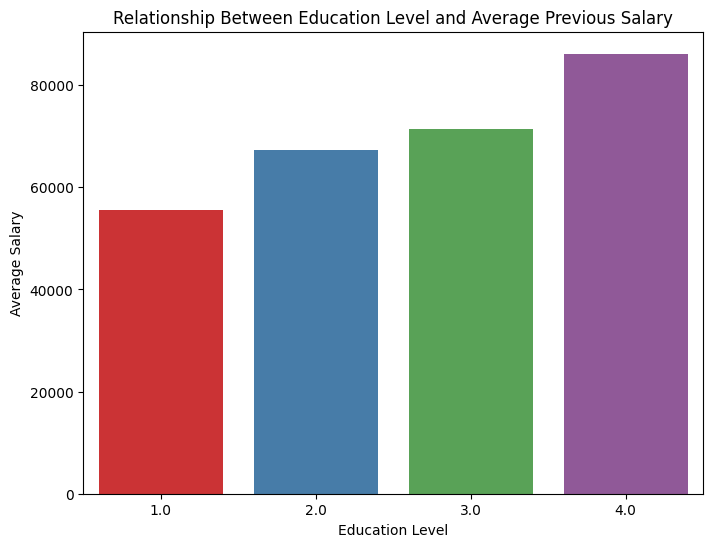

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=hiring_stats3, x='EdLevelR', y='PreviousSalary', ci=None, palette='Set1')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Relationship Between Education Level and Average Previous Salary')
plt.show()

Salary and Education Level have a positive correlation as the higher your Education the higher your salary.z

### Testing for correlation

In [ ]:
hiring_stats3.drop(columns = 'Continent', inplace=True)

/tmp/ipykernel_59/391565860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats3.drop(columns = 'Continent', inplace=True)


In [ ]:
hiring_stats3.corr()

,AgeR,EdLevelR,GenderR,MentalHealthR,YearsCode,PreviousSalary,ComputerSkills,Employed,HaveWorkedWith10
AgeR,1.000000,0.158006,-0.022046,-0.014396,0.675490,0.321920,-0.062710,-0.029799,-0.082910
EdLevelR,0.158006,1.000000,0.011883,-0.089376,0.171749,0.096066,-0.106490,-0.112233,-0.095529
GenderR,-0.022046,0.011883,1.000000,0.104667,-0.040884,0.005744,-0.030895,-0.026681,-0.018751
MentalHealthR,-0.014396,-0.089376,0.104667,1.000000,-0.010109,0.070134,0.029561,0.022191,0.017863
YearsCode,0.675490,0.171749,-0.040884,-0.010109,1.000000,0.391698,-0.025135,-0.005017,-0.061625
PreviousSalary,0.321920,0.096066,0.005744,0.070134,0.391698,1.000000,0.023742,-0.003330,0.020476
ComputerSkills,-0.062710,-0.106490,-0.030895,0.029561,-0.025135,0.023742,1.000000,0.590106,0.772791
Employed,-0.029799,-0.112233,-0.026681,0.022191,-0.005017,-0.003330,0.590106,1.000000,0.447334
HaveWorkedWith10,-0.082910,-0.095529,-0.018751,0.017863,-0.061625,0.020476,0.772791,0.447334,1.000000


Based on this information I can see there is little to no correlation between Age, Gender, and Years Coding but there may be some difference on whether a person is employed based on Education level and a moderately positive correlation of a person's ability to get hired based on their Computer Skills and the coding languages the applicant has worked with. There is also a slight correlation with a person's mental health status which I find interesting..

# Creating our Machine Learning Model

# Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting the data into training and testing sets

In [ ]:
hiring_stats3.head()

,AgeR,EdLevelR,GenderR,MentalHealthR,YearsCode,PreviousSalary,ComputerSkills,Employed,HaveWorkedWith10
0,0,3.0,0,0,7,51552.0,4,0,3
1,0,2.0,0,0,12,46482.0,12,1,7
2,0,3.0,0,0,15,77290.0,7,0,1
3,0,2.0,0,0,9,46135.0,13,0,7
4,1,4.0,0,0,40,160932.0,2,0,1


# Creating a Proficiency Score for HaveWorkedWith10 and a Normalized Scale for Computer Skills

# Defining the min and max values

In [ ]:
min_value = hiring_stats3['HaveWorkedWith10'].min()
max_value = hiring_stats3['HaveWorkedWith10'].max()


Defining what the min and max values should be

In [ ]:
min_score = 0
max_score = 10

Applying the min and max values to the HaveWorkedWith10 column and creating a new column called Proficiency Score to normalize the data

In [ ]:
hiring_stats3['ProficiencyScore'] = min_score + ((hiring_stats3['HaveWorkedWith10'] - min_value) / (max_value - min_value)) * (max_score - min_score)


/tmp/ipykernel_59/3533662844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats3['ProficiencyScore'] = min_score + ((hiring_stats3['HaveWorkedWith10'] - min_value) / (max_value - min_value)) * (max_score - min_score)


Rounding the Proficiency Score to the nearest whole number

In [ ]:
hiring_stats3['ProficiencyScore'] = hiring_stats3['ProficiencyScore'].round(0).astype(int)

/tmp/ipykernel_59/498950932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats3['ProficiencyScore'] = hiring_stats3['ProficiencyScore'].round(0).astype(int)


Creating a Normalized Scale for Computer Skills

Defining min and max values for Computer Skills

In [ ]:
min_value = hiring_stats3['ComputerSkills'].min()
max_value = hiring_stats3['ComputerSkills'].max()

Defining what the min and max values should be

In [ ]:
min_score = 0
max_score = 107

# Applying the normalized values to transform the data into the desired scale

In [ ]:
hiring_stats3['NormalizedComputerSkills'] = (hiring_stats3['ComputerSkills'] - min_value) / (max_value - min_value)

/tmp/ipykernel_59/4277128161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats3['NormalizedComputerSkills'] = (hiring_stats3['ComputerSkills'] - min_value) / (max_value - min_value)


Rounding the Values to two decimal places 

In [ ]:
hiring_stats3['NormalizedComputerSkills'] = hiring_stats3['NormalizedComputerSkills'].round(2)

/tmp/ipykernel_59/2679587998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats3['NormalizedComputerSkills'] = hiring_stats3['NormalizedComputerSkills'].round(2)


In [ ]:
hiring_stats3.head()

,AgeR,EdLevelR,GenderR,MentalHealthR,YearsCode,PreviousSalary,ComputerSkills,Employed,HaveWorkedWith10,ProficiencyScore,NormalizedComputerSkills
0,0,3.0,0,0,7,51552.0,4,0,3,3,0.04
1,0,2.0,0,0,12,46482.0,12,1,7,7,0.11
2,0,3.0,0,0,15,77290.0,7,0,1,1,0.07
3,0,2.0,0,0,9,46135.0,13,0,7,7,0.12
4,1,4.0,0,0,40,160932.0,2,0,1,1,0.02


Dropping the original HaveWorkedWith10 column and ComputerSkills to reduce redundancy in our model

In [ ]:
hiring_stats3.drop(columns=['HaveWorkedWith10', 'ComputerSkills'], inplace=True)

/tmp/ipykernel_59/1818973884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_stats3.drop(columns=['HaveWorkedWith10', 'ComputerSkills'], inplace=True)


In [ ]:
hiring_stats3.head()

,AgeR,EdLevelR,GenderR,MentalHealthR,YearsCode,PreviousSalary,Employed,ProficiencyScore,NormalizedComputerSkills
0,0,3.0,0,0,7,51552.0,0,3,0.04
1,0,2.0,0,0,12,46482.0,1,7,0.11
2,0,3.0,0,0,15,77290.0,0,1,0.07
3,0,2.0,0,0,9,46135.0,0,7,0.12
4,1,4.0,0,0,40,160932.0,0,1,0.02


Subsetting our columns into x and y variables

In [ ]:
x = hiring_stats3.drop('Employed', axis=1)
y = hiring_stats3['Employed']

Train, Test, Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

Create Initial Decision Tree

In [ ]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

Assessing the Model and Predictions

In [ ]:
ForecastPredictions = decisionTree.predict(x_test)

In [ ]:
ForecastPredictions

array([0, 1, 1, ..., 0, 1, 1])

Printing the Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, ForecastPredictions))

[[6207 2533]
 [2729 7317]]


Based on our matrix the model is fairly accurate at predicting if an applicant will be employed or not but it is not perfect and did make some errors. 6,207 were accurately predicted to be employed and 7,317 applicants were correctly predicted to not be employed. However 2,533 applicants were incorrectly predicted to be employed when they were not and 2,729 were incorrectly predicted to not be employed when they were. 

Determining the Model Fit

In [ ]:
print(classification_report(y_test, ForecastPredictions))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      8740
           1       0.74      0.73      0.74     10046

    accuracy                           0.72     18786
   macro avg       0.72      0.72      0.72     18786
weighted avg       0.72      0.72      0.72     18786



The model has a 72% accuracy overall of predicting if an applicant will be hired or not. It appears our precision is better in predicting if the applicant is hired at 74% and less so when the applicant is not hired at a 69% precision rate. 

# Creating a Random Forest Model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Defining the x and y variables

In [ ]:
x = hiring_stats3.drop('Employed', axis=1)
y = hiring_stats3['Employed']

Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

Initial Random Forest Model

In [ ]:
forest = RandomForestClassifier(n_estimators=300, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=76)

# Evaluate Model Fit

In [ ]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[6473 2267]
 [1955 8091]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      8740
           1       0.78      0.81      0.79     10046

    accuracy                           0.78     18786
   macro avg       0.77      0.77      0.77     18786
weighted avg       0.78      0.78      0.77     18786



Our Random Forest Model faired much better than our Decision Tree Model with an over accuracy of 78% and was much better at predicting if an applicant will be hired or not at 77 % and 78%. 6,473 were accurately predicted to not be employed and 8,091 applicants were correctly predicted to be employed. However 2,267 applicants were incorrectly predicted to be employed when they were not and 1,955 were incorrectly predicted to not be employed when they were. 

### Creating a Visual of the Random Forest Model

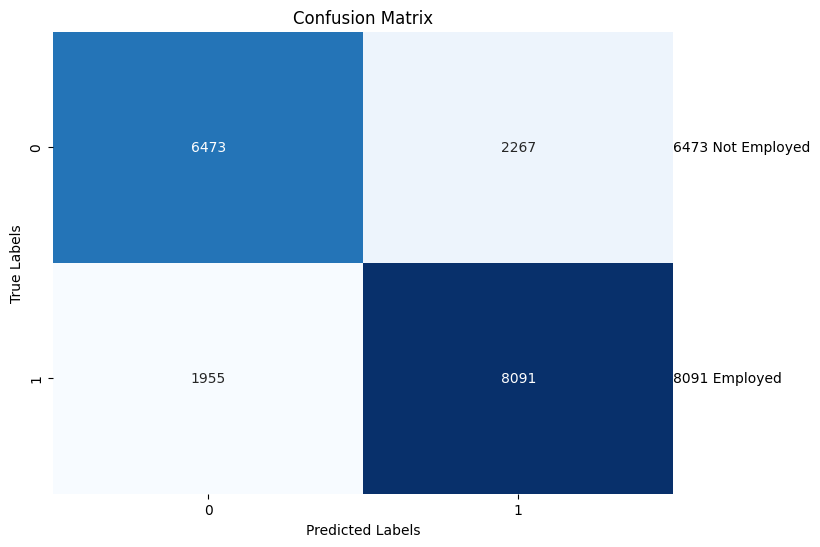

In [ ]:
conf_matrix = [[6473, 2267],
               [1955, 8091]]  

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

legend_labels = {'Not Employed': '6473','Employed': '8091'}  
for text, label in legend_labels.items():
    plt.text(2, list(legend_labels.values()).index(label) + 0.5, f'{label} {text}', ha='left', va='center')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Visualizing the classification report

In [ ]:
class_report = classification_report(y_test, forestPredictions, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

/tmp/ipykernel_59/532018429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_report_df.index, y=class_report_df['f1-score'], palette='viridis')


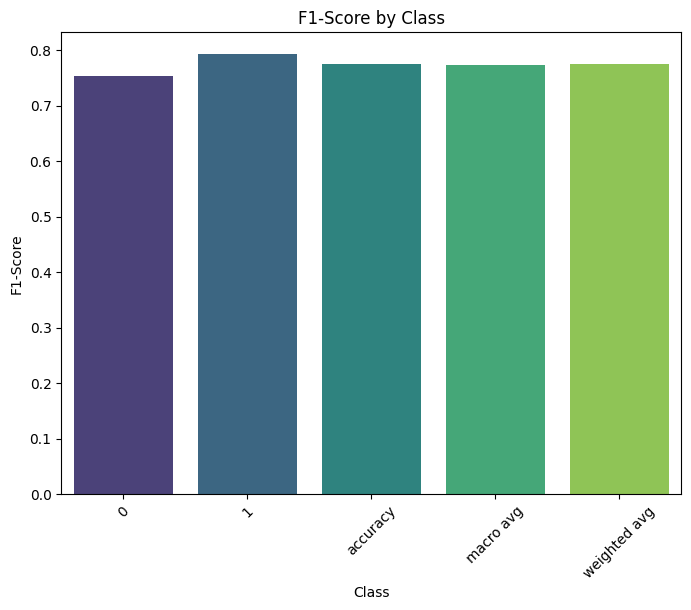

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_report_df.index, y=class_report_df['f1-score'], palette='viridis')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class')
plt.xticks(rotation=45)
plt.show()

# Performing Hyperparameter Tuning on our Random Forest Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

Number of Estimators

In [ ]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.7200042584903652
4 : 0.744117960183115
5 : 0.7574257425742574
8 : 0.7606196103481316
10 : 0.7639731715106994
20 : 0.7698818268923666
50 : 0.7722239965932077
75 : 0.7743000106462259
100 : 0.7750452464601298
250 : 0.7749920153305653
500 : 0.7757904822740339


Looks like 300 was a pretty accurate choice in number of decision trees as the accuracy does not increase past 77% whether we use 50 or 500.

Feature Importance

In [ ]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

AgeR                        0.007672
EdLevelR                    0.024745
GenderR                     0.008242
MentalHealthR               0.009678
YearsCode                   0.141959
PreviousSalary              0.304177
ProficiencyScore            0.120265
NormalizedComputerSkills    0.383263
dtype: float64

In [ ]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

NormalizedComputerSkills    0.383263
PreviousSalary              0.304177
YearsCode                   0.141959
ProficiencyScore            0.120265
EdLevelR                    0.024745
MentalHealthR               0.009678
GenderR                     0.008242
AgeR                        0.007672
dtype: float64


<Axes: >

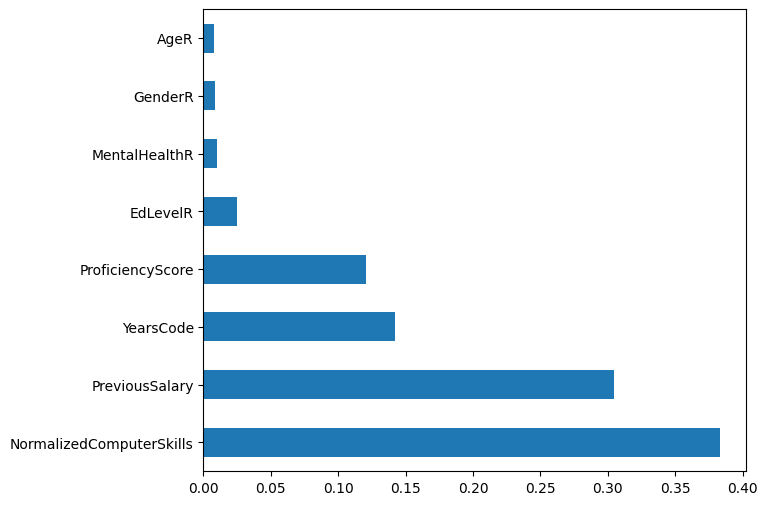

In [ ]:
feature_importances.plot(kind='barh', figsize=(7,6))

Appears our most important features would be Computer Skills, Previous Salary, and Years Coding.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2db1c025-3e82-4def-8015-9dae752b5256' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>